In [1219]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit

In [1220]:
dfolder = 'data/'

In [1221]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [1222]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1223]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1224]:
df = df[df['year'] != 1920]
df = df[df['year'] >= 1989]

In [1225]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1226]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [1227]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 85.76270820514482%
deaths: 85.76270820514482%
state_deaths: 85.76270820514482%
nonstate_deaths: 85.76270820514482%
onesided_deaths: 85.76270820514482%
civilian_deaths: 85.76270820514482%


In [1228]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [1229]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1230]:
df['nonstate_deaths'].fillna(0, inplace=True)
df['onesided_deaths'].fillna(0, inplace=True)
df['civilian_deaths'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['state_deaths'].fillna(0, inplace=True)


In [1231]:
df.MonthYear.dtype
df.year.dtype
df.month.dtype

dtype('int64')

In [1232]:
# dataFrame with all possible MonthYear for each isocode
all_dates = pd.date_range(start='1989-01-01', end='2023-04-01', freq='M')
all_isocodes = df['isocode'].unique()

# each isocode with a full range of dates
dfs = [pd.DataFrame(data={'MonthYear': (all_dates.year*100 + all_dates.month).astype(int), 
                          'year': all_dates.year, 
                          'month': all_dates.month, 
                          'isocode': iso}) for iso in all_isocodes]

# concatenation
full_df = pd.concat(dfs)

# merge
merged_df = pd.merge(full_df, df, on=['MonthYear', 'isocode', 'month', 'year'], how='left')

# fill missing values 
merged_df.fillna(0, inplace=True)


In [1233]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

merged_df['country'] = merged_df['isocode'].apply(get_country_name)

In [1234]:
merged_df

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901,1989,1,AFG,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98635,202211,2022,11,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98636,202212,2022,12,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98637,202301,2023,1,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98638,202302,2023,2,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0


Every country isocode has the correct number of months in MonthYear. No months are missing.
For every country, the months are in ascending order, meaning the data for each isocode is ordered correctly by time.


In [1235]:
# Check for any missing months
num_months = len(pd.date_range(start='1989-01-01', end='2023-04-01', freq='M'))
month_counts = merged_df.groupby('isocode')['MonthYear'].nunique()
assert month_counts.min() == num_months, "Some countries have missing months"

# Check if months are in ascending order
is_monotonic = merged_df.groupby('isocode')['MonthYear'].apply(lambda x: x.is_monotonic_increasing)
assert is_monotonic.all(), "Some countries have months not in ascending order"


In [1236]:
num_months

411

In [1237]:
is_monotonic

isocode
ABW    True
AFG    True
AGO    True
AIA    True
ALB    True
       ... 
XKX    True
YEM    True
ZAF    True
ZMB    True
ZWE    True
Name: MonthYear, Length: 240, dtype: bool

In [1238]:
df = merged_df

In [1239]:
df.describe()

,MonthYear,year,month,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_16_opp,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
count,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,9.864000e+04,98640.000000,98640.000000,98640.000000,...,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000
mean,200569.240876,2005.627737,6.467153,2061.783212,1036.090328,1056.731610,3.635279e+03,1148.470884,330.477088,487.539842,...,2.324534,12.211131,10.127149,29.686902,0.130677,26.392285,14.381144,3.159925,8.851217,11.036040
std,988.722947,9.887746,3.461416,17051.109226,9201.930825,8336.646559,2.703776e+04,8908.348451,2494.047143,4684.973828,...,13.210119,74.661814,58.200193,172.671933,1.475955,1678.392295,193.052705,57.526111,1662.525887,1664.219859
min,198901.000000,1989.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199707.000000,1997.000000,3.000000,16.000000,8.000000,10.000000,4.200000e+01,10.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200602.000000,2006.000000,6.000000,158.000000,74.000000,98.000000,3.720000e+02,104.000000,24.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201409.000000,2014.000000,9.000000,756.000000,356.000000,442.000000,1.640000e+03,472.000000,126.000000,154.000000,...,0.000000,4.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202303.000000,2023.000000,12.000000,634448.000000,345500.000000,311928.000000,1.008004e+06,352824.000000,86990.000000,177042.000000,...,852.000000,6644.000000,2370.000000,8722.000000,204.000000,522125.000000,25512.000000,7513.000000,521530.000000,521620.000000


In [1240]:
merged_df

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901,1989,1,AFG,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98635,202211,2022,11,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98636,202212,2022,12,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98637,202301,2023,1,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98638,202302,2023,2,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0


In [1241]:
#Stock function from class
def stock_simple(x: pd.Series, decay: float = 0.8):
    # xs is a stock of x inflow with a decay of 0.8
    x = list(x.fillna(0))
    xs = [] 
    for n in range(len(x)):
        if n == 0: 
            xs.append(x[n]) # stock starts in initial value
        else:
            xs.append(x[n] + decay * xs[n-1])
    return xs

#Decimal representation of count_events share
columns_to_divide = [col for col in df.columns if col.startswith('count_events_')]

for col in columns_to_divide:
    df[col] = df[col] / 100

#Creating variable conflict
df['conflict'] =  0
df.loc[df['deaths'] >= 100, 'conflict'] = 1 #Threshold: 100 deaths

#Creating stock variables
# List of column prefixes
count_events_prefixes = ['count_events_' + str(i) for i in range(1, 21)]

# List of suffixes
suffixes = ['', '_gov', '_opp']

# Creating stock variables for each column
for prefix in count_events_prefixes:
    for suffix in suffixes:
        col_name = prefix + suffix
        if col_name in df.columns:
            df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
                                       .apply(lambda x: stock_simple(x))
                                       .explode().reset_index(drop=True))


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/4087785855.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/4087785855.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/4087785855.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

In [1242]:
def make_target(df, t):
    # t is the number of periods for the shift

    # loop through each period and generate the shift variables
    for i in range(1, t+1):
        col_name = f'conflict_f{i}'
        df[col_name] = df.groupby('isocode')['conflict'].shift(-i)

    # take the maximum for t periods forward and create the new variable
    df['target_f{}'.format(t)] = df[[f'conflict_f{i}' for i in range(1, t+1)]].max(axis=1, skipna=False)

    # drop the shift variables
    df = df.drop(columns=[f'conflict_f{i}' for i in range(1, t+1)])

    # make the onset variable which ignores periods of ongoing conflict
    df['ons_target_f{}'.format(t)]=df['target_f{}'.format(t)]

    df.loc[df['conflict'] == 1, 'ons_target_f{}'.format(t)] = np.nan
    
    return(df)


In [1243]:
df.conflict.nunique()

2

In [1244]:
df.columns

Index(['MonthYear', 'year', 'month', 'isocode', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6',
       ...
       'count_events_17_opp_stock', 'count_events_18_stock',
       'count_events_18_gov_stock', 'count_events_18_opp_stock',
       'count_events_19_stock', 'count_events_19_gov_stock',
       'count_events_19_opp_stock', 'count_events_20_stock',
       'count_events_20_gov_stock', 'count_events_20_opp_stock'],
      dtype='object', length=131)

In [1245]:
def prepare_slice(count_events, year, month, dep, forward):
    
    data=df
    
    print(dep)
    print('pre drop ', len(data))
    
    #the future data is the data we use to produce the fitted values(predicted probabilities) that are stored
    future = data.drop(data[(data.year != year) | (data.month != month)].index)	
    data = data.drop(data[((data.year > year)) | ((data.year == year) & (data.month >= month))].index)

    #make the target variable through the function above
    data = make_target(data, forward)
    
    print(year)
    print(month)

    #making one model
    fullmodel = []

    for z in range(1, count_events + 1):
        this = 'count_events_' + str(z) + '_stock'
        fullmodel.append(this)
        this = 'count_events_' + str(z)
        fullmodel.append(this)
        this = 'count_events_' + str(z) + '_opp'
        fullmodel.append(this)
        this = 'count_events_' + str(z) + '_gov'
        fullmodel.append(this)
        
        
         
    together=[]
    for thang in fullmodel:
        together.append(thang)
        
    together.append('target_f{}'.format(forward))  # use the target variable created in make_target
    together.append('isocode')
    together.append('year')
    together.append('month')

    #model is the full or augmented model
    data2 = data[together]
    df1 = data2.dropna(how='any')
    print('post drop model', len(df1))
    df2 = df1['target_f{}'.format(forward)]  # use the target variable created in make_target
    #dependent variable for full model
    ys = df2.values.ravel()
    
    #now get the model back
    together.remove('target_f{}'.format(forward))  # use the target variable created in make_target
    
    #prepare out of sample for the models
    future2 = future[together]
    future_df1 = future2.dropna(how='any')

    #training data
    X = df1[fullmodel]
    
    #data at time T for producing fitted values
    X_future = future_df1[fullmodel]
    
    return ys, X, X_future, future_df1


In [1246]:
gendata=1

for depths in [8]:
    for min_samples_leafs in [100]:
        print(f'Checking forward depth {depths} and minleafs {min_samples_leafs}')

        trees=700
        min_samples_splits=2
        
        forward=1
        count_events=20
        startyearid=2021
        deps=['ons_target_f{}'.format(forward)]

        search=0
        initialize=1

        if initialize==1:
            monthid=1
            #my_file = Path(readin + "forecast_data_forstudents.csv")
            data = df
            future = data.drop(data[(data.year != startyearid) | (data.month != monthid)].index)			
            fittedvalues=['isocode', 'year', 'month']
            fittedframe=future[fittedvalues]

            print(startyearid)
            print(monthid)
            y, X, X_future, future_model = prepare_slice(count_events, startyearid, monthid, deps, forward)

            fittedframe_future_top = future_model[fittedvalues]


Checking forward depth 8 and minleafs 100
2021
1
['ons_target_f1']
pre drop  98640
2021
1
post drop model 91920


In [1247]:
X

,count_events_1_stock,count_events_1,count_events_1_opp,count_events_1_gov,count_events_2_stock,count_events_2,count_events_2_opp,count_events_2_gov,count_events_3_stock,count_events_3,...,count_events_18_opp,count_events_18_gov,count_events_19_stock,count_events_19,count_events_19_opp,count_events_19_gov,count_events_20_stock,count_events_20,count_events_20_opp,count_events_20_gov
0,0.0,4.62,0.40,1.88,0.0,2.56,0.20,0.90,0.0,3.38,...,0.14,0.08,0.0,8.34,0.76,2.62,0.0,0.0,0.0,0.0
1,0.0,9.16,0.60,3.62,0.0,5.16,0.50,2.34,0.0,6.30,...,0.20,0.58,0.0,9.78,1.72,3.20,0.0,0.0,0.0,0.0
2,0.0,5.46,0.46,2.26,0.0,2.74,0.20,1.40,0.04,2.06,...,0.28,0.30,0.0,10.84,2.18,3.78,0.0,0.0,0.0,0.0
3,0.0,3.64,0.28,1.68,0.0,2.62,0.14,1.26,0.032,1.82,...,0.40,0.62,0.0,10.00,2.58,3.94,0.0,0.0,0.0,0.0
4,0.0,3.12,0.28,1.74,0.0,1.50,0.04,0.74,0.0256,1.56,...,0.16,0.08,0.0,5.66,0.80,2.10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98607,251.052301,0.00,0.00,0.00,120.037537,0.00,0.00,0.00,78.318026,0.00,...,0.00,0.00,63.47361,0.00,0.00,0.00,0.479259,0.0,0.0,0.0
98608,250.44184,0.00,0.00,0.00,123.87003,0.00,0.00,0.00,76.674421,0.00,...,0.00,0.00,63.918888,0.00,0.00,0.00,0.503407,0.0,0.0,0.0
98609,257.473472,0.00,0.00,0.00,123.916024,0.00,0.00,0.00,84.459537,0.00,...,0.00,0.00,64.575111,0.00,0.00,0.00,0.442726,0.0,0.0,0.0
98610,238.318778,0.00,0.00,0.00,117.232819,0.00,0.00,0.00,78.68763,0.00,...,0.00,0.00,60.740088,0.00,0.00,0.00,0.354181,0.0,0.0,0.0


In [1248]:
future_model

,count_events_1_stock,count_events_1,count_events_1_opp,count_events_1_gov,count_events_2_stock,count_events_2,count_events_2_opp,count_events_2_gov,count_events_3_stock,count_events_3,...,count_events_19,count_events_19_opp,count_events_19_gov,count_events_20_stock,count_events_20,count_events_20_opp,count_events_20_gov,isocode,year,month
384,2.55327,49.92,3.60,20.60,2.26015,20.96,1.42,9.42,3.006204,22.80,...,63.26,8.28,21.46,0.0,0.2,0.0,0.06,AFG,2021,1
795,316.583831,3.12,0.10,1.56,128.418244,1.68,0.00,0.52,157.980405,2.46,...,1.34,0.06,0.12,0.848317,0.0,0.0,0.00,AGO,2021,1
1206,23.287082,1.88,0.06,0.68,12.337394,0.90,0.00,0.22,14.541243,2.36,...,1.34,0.04,0.50,0.051495,0.0,0.0,0.00,ALB,2021,1
1617,1.273687,28.22,0.00,8.16,1.882802,16.84,0.02,4.92,0.685892,20.68,...,7.80,0.06,1.96,0.0,0.0,0.0,0.00,ARE,2021,1
2028,15.676086,9.94,0.08,2.12,9.103214,5.56,0.00,1.08,10.929625,6.92,...,3.40,0.06,0.72,0.245607,0.0,0.0,0.00,ARG,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96969,7.635847,0.28,0.00,0.12,4.579054,0.12,0.00,0.04,6.688316,0.02,...,0.08,0.00,0.00,0.253523,0.0,0.0,0.00,IMN,2021,1
97380,82.143732,0.00,0.00,0.00,38.73541,0.00,0.00,0.00,25.189862,0.00,...,0.00,0.00,0.00,0.264768,0.0,0.0,0.00,WLF,2021,1
97791,663.376686,0.10,0.00,0.00,330.906801,0.02,0.00,0.02,252.995526,0.00,...,0.00,0.00,0.00,0.874608,0.0,0.0,0.00,IOT,2021,1
98202,62.16251,0.00,0.00,0.00,36.865747,0.00,0.00,0.00,21.247873,0.00,...,0.00,0.00,0.00,0.050126,0.0,0.0,0.00,BVT,2021,1


In [1249]:
X_future

,count_events_1_stock,count_events_1,count_events_1_opp,count_events_1_gov,count_events_2_stock,count_events_2,count_events_2_opp,count_events_2_gov,count_events_3_stock,count_events_3,...,count_events_18_opp,count_events_18_gov,count_events_19_stock,count_events_19,count_events_19_opp,count_events_19_gov,count_events_20_stock,count_events_20,count_events_20_opp,count_events_20_gov
384,2.55327,49.92,3.60,20.60,2.26015,20.96,1.42,9.42,3.006204,22.80,...,1.72,4.80,0.413295,63.26,8.28,21.46,0.0,0.2,0.0,0.06
795,316.583831,3.12,0.10,1.56,128.418244,1.68,0.00,0.52,157.980405,2.46,...,0.00,0.02,389.46546,1.34,0.06,0.12,0.848317,0.0,0.0,0.00
1206,23.287082,1.88,0.06,0.68,12.337394,0.90,0.00,0.22,14.541243,2.36,...,0.02,0.10,6.828473,1.34,0.04,0.50,0.051495,0.0,0.0,0.00
1617,1.273687,28.22,0.00,8.16,1.882802,16.84,0.02,4.92,0.685892,20.68,...,0.00,0.44,0.130018,7.80,0.06,1.96,0.0,0.0,0.0,0.00
2028,15.676086,9.94,0.08,2.12,9.103214,5.56,0.00,1.08,10.929625,6.92,...,0.02,0.08,7.92015,3.40,0.06,0.72,0.245607,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96969,7.635847,0.28,0.00,0.12,4.579054,0.12,0.00,0.04,6.688316,0.02,...,0.00,0.00,4.061696,0.08,0.00,0.00,0.253523,0.0,0.0,0.00
97380,82.143732,0.00,0.00,0.00,38.73541,0.00,0.00,0.00,25.189862,0.00,...,0.00,0.00,82.07727,0.00,0.00,0.00,0.264768,0.0,0.0,0.00
97791,663.376686,0.10,0.00,0.00,330.906801,0.02,0.00,0.02,252.995526,0.00,...,0.00,0.00,280.362932,0.00,0.00,0.00,0.874608,0.0,0.0,0.00
98202,62.16251,0.00,0.00,0.00,36.865747,0.00,0.00,0.00,21.247873,0.00,...,0.00,0.00,11.531067,0.00,0.00,0.00,0.050126,0.0,0.0,0.00


In [1250]:
def runsearch(Xs, ys):   
    print("going in")

    model = RandomForestClassifier()
    parameters = {'max_depth'         : [4, 8],
                  'min_samples_leaf'    : [50, 100],
                  'n_estimators': [700]}

    grid = GridSearchCV(return_train_score=True, estimator=model, param_grid = parameters, cv = 3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid.fit(Xs, ys)

    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.cv_results_)
    
    clf=RandomForestClassifier(**grid.best_params_)
    
    return clf

In [1251]:
def setparams(treenumber, depthnumber, min_samples_number, min_samples_leaf_number):  
    print("setting parameters")
    print("they are:", treenumber, depthnumber, min_samples_number, min_samples_leaf_number)
    
    clf=RandomForestClassifier(n_estimators=treenumber,  max_depth =depthnumber, 
                               min_samples_split =min_samples_number, min_samples_leaf =  min_samples_leaf_number
                             ,n_jobs=8)
    return clf

In [1252]:
gendata=1

depths = 8
trees = 700
min_samples_splits = 2
min_samples_leafs = 100
forward = 1
startyearid = 2010
deps = ['ons_target_f{}'.format(forward)]
initialize = 1
search = 0

# Initialize an empty dataframe for storing fitted values
fittedvalues=['isocode', 'year', 'month']
fittedframe = pd.DataFrame(columns=['isocode','year','month'])

for yearid in range(startyearid, 2024):
    if yearid<2023:
        maxmonth = 13
        print("before 2023, going till", maxmonth)
    else:
        maxmonth = 4
        print("in 2023, going till", maxmonth)

    for monthid in range(1, maxmonth):
        print(yearid)
        print(monthid)

        y, X, X_future, future_model = prepare_slice(count_events, yearid, monthid, deps, forward)
        fittedframe_future = future_model[fittedvalues]
        
        # Perform grid search or set parameters directly
        if search == 1:
            print("entering search")
            clf = runsearch(X, y)
        else:
            clf = setparams(trees, depths, min_samples_splits, min_samples_leafs)

        # Fit the model and make predictions
        clf.fit(X, y)
        res = clf.predict_proba(X_future)
        fittedframe_future[deps[0]+'_pred'] = res[:, 1]

        # Append the predictions to the fittedframe
        fittedframe = pd.concat([fittedframe, fittedframe_future])

gendata = 1
fittedframe.to_csv("{}_predictions.csv".format(deps[0]))


before 2023, going till 13
2010
1
['ons_target_f1']
pre drop  98640
2010
1
post drop model 60240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
2
['ons_target_f1']
pre drop  98640
2010
2
post drop model 60480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
3
['ons_target_f1']
pre drop  98640
2010
3
post drop model 60720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
4
['ons_target_f1']
pre drop  98640
2010
4
post drop model 60960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
5
['ons_target_f1']
pre drop  98640
2010
5
post drop model 61200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
6
['ons_target_f1']
pre drop  98640
2010
6
post drop model 61440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
7
['ons_target_f1']
pre drop  98640
2010
7
post drop model 61680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
8
['ons_target_f1']
pre drop  98640
2010
8
post drop model 61920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
9
['ons_target_f1']
pre drop  98640
2010
9
post drop model 62160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
10
['ons_target_f1']
pre drop  98640
2010
10
post drop model 62400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
11
['ons_target_f1']
pre drop  98640
2010
11
post drop model 62640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
12
['ons_target_f1']
pre drop  98640
2010
12
post drop model 62880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2011
1
['ons_target_f1']
pre drop  98640
2011
1
post drop model 63120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
2
['ons_target_f1']
pre drop  98640
2011
2
post drop model 63360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
3
['ons_target_f1']
pre drop  98640
2011
3
post drop model 63600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
4
['ons_target_f1']
pre drop  98640
2011
4
post drop model 63840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
5
['ons_target_f1']
pre drop  98640
2011
5
post drop model 64080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
6
['ons_target_f1']
pre drop  98640
2011
6
post drop model 64320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
7
['ons_target_f1']
pre drop  98640
2011
7
post drop model 64560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
8
['ons_target_f1']
pre drop  98640
2011
8
post drop model 64800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
9
['ons_target_f1']
pre drop  98640
2011
9
post drop model 65040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
10
['ons_target_f1']
pre drop  98640
2011
10
post drop model 65280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
11
['ons_target_f1']
pre drop  98640
2011
11
post drop model 65520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
12
['ons_target_f1']
pre drop  98640
2011
12
post drop model 65760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2012
1
['ons_target_f1']
pre drop  98640
2012
1
post drop model 66000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
2
['ons_target_f1']
pre drop  98640
2012
2
post drop model 66240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
3
['ons_target_f1']
pre drop  98640
2012
3
post drop model 66480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
4
['ons_target_f1']
pre drop  98640
2012
4
post drop model 66720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
5
['ons_target_f1']
pre drop  98640
2012
5
post drop model 66960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
6
['ons_target_f1']
pre drop  98640
2012
6
post drop model 67200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
7
['ons_target_f1']
pre drop  98640
2012
7
post drop model 67440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
8
['ons_target_f1']
pre drop  98640
2012
8
post drop model 67680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
9
['ons_target_f1']
pre drop  98640
2012
9
post drop model 67920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
10
['ons_target_f1']
pre drop  98640
2012
10
post drop model 68160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
11
['ons_target_f1']
pre drop  98640
2012
11
post drop model 68400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
12
['ons_target_f1']
pre drop  98640
2012
12
post drop model 68640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2013
1
['ons_target_f1']
pre drop  98640
2013
1
post drop model 68880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
2
['ons_target_f1']
pre drop  98640
2013
2
post drop model 69120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
3
['ons_target_f1']
pre drop  98640
2013
3
post drop model 69360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
4
['ons_target_f1']
pre drop  98640
2013
4
post drop model 69600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
5
['ons_target_f1']
pre drop  98640
2013
5
post drop model 69840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
6
['ons_target_f1']
pre drop  98640
2013
6
post drop model 70080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
7
['ons_target_f1']
pre drop  98640
2013
7
post drop model 70320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
8
['ons_target_f1']
pre drop  98640
2013
8
post drop model 70560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
9
['ons_target_f1']
pre drop  98640
2013
9
post drop model 70800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
10
['ons_target_f1']
pre drop  98640
2013
10
post drop model 71040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
11
['ons_target_f1']
pre drop  98640
2013
11
post drop model 71280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
12
['ons_target_f1']
pre drop  98640
2013
12
post drop model 71520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2014
1
['ons_target_f1']
pre drop  98640
2014
1
post drop model 71760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
2
['ons_target_f1']
pre drop  98640
2014
2
post drop model 72000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
3
['ons_target_f1']
pre drop  98640
2014
3
post drop model 72240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
4
['ons_target_f1']
pre drop  98640
2014
4
post drop model 72480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
5
['ons_target_f1']
pre drop  98640
2014
5
post drop model 72720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
6
['ons_target_f1']
pre drop  98640
2014
6
post drop model 72960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
7
['ons_target_f1']
pre drop  98640
2014
7
post drop model 73200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
8
['ons_target_f1']
pre drop  98640
2014
8
post drop model 73440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
9
['ons_target_f1']
pre drop  98640
2014
9
post drop model 73680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
10
['ons_target_f1']
pre drop  98640
2014
10
post drop model 73920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
11
['ons_target_f1']
pre drop  98640
2014
11
post drop model 74160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
12
['ons_target_f1']
pre drop  98640
2014
12
post drop model 74400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2015
1
['ons_target_f1']
pre drop  98640
2015
1
post drop model 74640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
2
['ons_target_f1']
pre drop  98640
2015
2
post drop model 74880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
3
['ons_target_f1']
pre drop  98640
2015
3
post drop model 75120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
4
['ons_target_f1']
pre drop  98640
2015
4
post drop model 75360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
5
['ons_target_f1']
pre drop  98640
2015
5
post drop model 75600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
6
['ons_target_f1']
pre drop  98640
2015
6
post drop model 75840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
7
['ons_target_f1']
pre drop  98640
2015
7
post drop model 76080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
8
['ons_target_f1']
pre drop  98640
2015
8
post drop model 76320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
9
['ons_target_f1']
pre drop  98640
2015
9
post drop model 76560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
10
['ons_target_f1']
pre drop  98640
2015
10
post drop model 76800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
11
['ons_target_f1']
pre drop  98640
2015
11
post drop model 77040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
12
['ons_target_f1']
pre drop  98640
2015
12
post drop model 77280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2016
1
['ons_target_f1']
pre drop  98640
2016
1
post drop model 77520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
2
['ons_target_f1']
pre drop  98640
2016
2
post drop model 77760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
3
['ons_target_f1']
pre drop  98640
2016
3
post drop model 78000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
4
['ons_target_f1']
pre drop  98640
2016
4
post drop model 78240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
5
['ons_target_f1']
pre drop  98640
2016
5
post drop model 78480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
6
['ons_target_f1']
pre drop  98640
2016
6
post drop model 78720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
7
['ons_target_f1']
pre drop  98640
2016
7
post drop model 78960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
8
['ons_target_f1']
pre drop  98640
2016
8
post drop model 79200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
9
['ons_target_f1']
pre drop  98640
2016
9
post drop model 79440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
10
['ons_target_f1']
pre drop  98640
2016
10
post drop model 79680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
11
['ons_target_f1']
pre drop  98640
2016
11
post drop model 79920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
12
['ons_target_f1']
pre drop  98640
2016
12
post drop model 80160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2017
1
['ons_target_f1']
pre drop  98640
2017
1
post drop model 80400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
2
['ons_target_f1']
pre drop  98640
2017
2
post drop model 80640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
3
['ons_target_f1']
pre drop  98640
2017
3
post drop model 80880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
4
['ons_target_f1']
pre drop  98640
2017
4
post drop model 81120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
5
['ons_target_f1']
pre drop  98640
2017
5
post drop model 81360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
6
['ons_target_f1']
pre drop  98640
2017
6
post drop model 81600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
7
['ons_target_f1']
pre drop  98640
2017
7
post drop model 81840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
8
['ons_target_f1']
pre drop  98640
2017
8
post drop model 82080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
9
['ons_target_f1']
pre drop  98640
2017
9
post drop model 82320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
10
['ons_target_f1']
pre drop  98640
2017
10
post drop model 82560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
11
['ons_target_f1']
pre drop  98640
2017
11
post drop model 82800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
12
['ons_target_f1']
pre drop  98640
2017
12
post drop model 83040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2018
1
['ons_target_f1']
pre drop  98640
2018
1
post drop model 83280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
2
['ons_target_f1']
pre drop  98640
2018
2
post drop model 83520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
3
['ons_target_f1']
pre drop  98640
2018
3
post drop model 83760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
4
['ons_target_f1']
pre drop  98640
2018
4
post drop model 84000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
5
['ons_target_f1']
pre drop  98640
2018
5
post drop model 84240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
6
['ons_target_f1']
pre drop  98640
2018
6
post drop model 84480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
7
['ons_target_f1']
pre drop  98640
2018
7
post drop model 84720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
8
['ons_target_f1']
pre drop  98640
2018
8
post drop model 84960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
9
['ons_target_f1']
pre drop  98640
2018
9
post drop model 85200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
10
['ons_target_f1']
pre drop  98640
2018
10
post drop model 85440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
11
['ons_target_f1']
pre drop  98640
2018
11
post drop model 85680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
12
['ons_target_f1']
pre drop  98640
2018
12
post drop model 85920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2019
1
['ons_target_f1']
pre drop  98640
2019
1
post drop model 86160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
2
['ons_target_f1']
pre drop  98640
2019
2
post drop model 86400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
3
['ons_target_f1']
pre drop  98640
2019
3
post drop model 86640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
4
['ons_target_f1']
pre drop  98640
2019
4
post drop model 86880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
5
['ons_target_f1']
pre drop  98640
2019
5
post drop model 87120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
6
['ons_target_f1']
pre drop  98640
2019
6
post drop model 87360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
7
['ons_target_f1']
pre drop  98640
2019
7
post drop model 87600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
8
['ons_target_f1']
pre drop  98640
2019
8
post drop model 87840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
9
['ons_target_f1']
pre drop  98640
2019
9
post drop model 88080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
10
['ons_target_f1']
pre drop  98640
2019
10
post drop model 88320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
11
['ons_target_f1']
pre drop  98640
2019
11
post drop model 88560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
12
['ons_target_f1']
pre drop  98640
2019
12
post drop model 88800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2020
1
['ons_target_f1']
pre drop  98640
2020
1
post drop model 89040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
2
['ons_target_f1']
pre drop  98640
2020
2
post drop model 89280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
3
['ons_target_f1']
pre drop  98640
2020
3
post drop model 89520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
4
['ons_target_f1']
pre drop  98640
2020
4
post drop model 89760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
5
['ons_target_f1']
pre drop  98640
2020
5
post drop model 90000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
6
['ons_target_f1']
pre drop  98640
2020
6
post drop model 90240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
7
['ons_target_f1']
pre drop  98640
2020
7
post drop model 90480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
8
['ons_target_f1']
pre drop  98640
2020
8
post drop model 90720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
9
['ons_target_f1']
pre drop  98640
2020
9
post drop model 90960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
10
['ons_target_f1']
pre drop  98640
2020
10
post drop model 91200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
11
['ons_target_f1']
pre drop  98640
2020
11
post drop model 91440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
12
['ons_target_f1']
pre drop  98640
2020
12
post drop model 91680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2021
1
['ons_target_f1']
pre drop  98640
2021
1
post drop model 91920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
2
['ons_target_f1']
pre drop  98640
2021
2
post drop model 92160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
3
['ons_target_f1']
pre drop  98640
2021
3
post drop model 92400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
4
['ons_target_f1']
pre drop  98640
2021
4
post drop model 92640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
5
['ons_target_f1']
pre drop  98640
2021
5
post drop model 92880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
6
['ons_target_f1']
pre drop  98640
2021
6
post drop model 93120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
7
['ons_target_f1']
pre drop  98640
2021
7
post drop model 93360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
8
['ons_target_f1']
pre drop  98640
2021
8
post drop model 93600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
9
['ons_target_f1']
pre drop  98640
2021
9
post drop model 93840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
10
['ons_target_f1']
pre drop  98640
2021
10
post drop model 94080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
11
['ons_target_f1']
pre drop  98640
2021
11
post drop model 94320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
12
['ons_target_f1']
pre drop  98640
2021
12
post drop model 94560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2022
1
['ons_target_f1']
pre drop  98640
2022
1
post drop model 94800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
2
['ons_target_f1']
pre drop  98640
2022
2
post drop model 95040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
3
['ons_target_f1']
pre drop  98640
2022
3
post drop model 95280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
4
['ons_target_f1']
pre drop  98640
2022
4
post drop model 95520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
5
['ons_target_f1']
pre drop  98640
2022
5
post drop model 95760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
6
['ons_target_f1']
pre drop  98640
2022
6
post drop model 96000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
7
['ons_target_f1']
pre drop  98640
2022
7
post drop model 96240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
8
['ons_target_f1']
pre drop  98640
2022
8
post drop model 96480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
9
['ons_target_f1']
pre drop  98640
2022
9
post drop model 96720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
10
['ons_target_f1']
pre drop  98640
2022
10
post drop model 96960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
11
['ons_target_f1']
pre drop  98640
2022
11
post drop model 97200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
12
['ons_target_f1']
pre drop  98640
2022
12
post drop model 97440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


in 2023, going till 4
2023
1
['ons_target_f1']
pre drop  98640
2023
1
post drop model 97680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
2
['ons_target_f1']
pre drop  98640
2023
2
post drop model 97920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
3
['ons_target_f1']
pre drop  98640
2023
3
post drop model 98160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2916704791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


In [1253]:
data = df

for deps in [['ons_target_f{}'.format(forward)]]:
    
    my_file = Path("{}_predictions.csv".format(deps[0]))

    predictions = pd.read_table(my_file, sep=',').iloc[:, 1:]

    # Select only rows where the prediction is not NaN
    fittedvalues = predictions.dropna(subset=['{}_pred'.format(deps[0])])

    # Merge the predictions into the original dataframe
    data = data.merge(fittedvalues, how='left', on=['isocode', 'year', 'month'])

# Add dependent variables again
combined = make_target(data, forward)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98640 entries, 0 to 98639
Columns: 134 entries, MonthYear to ons_target_f1
dtypes: float64(68), int64(4), object(62)
memory usage: 101.6+ MB


In [1254]:
combined.ons_target_f1

0        NaN
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
98635    0.0
98636    0.0
98637    0.0
98638    0.0
98639    NaN
Name: ons_target_f1, Length: 98640, dtype: float64

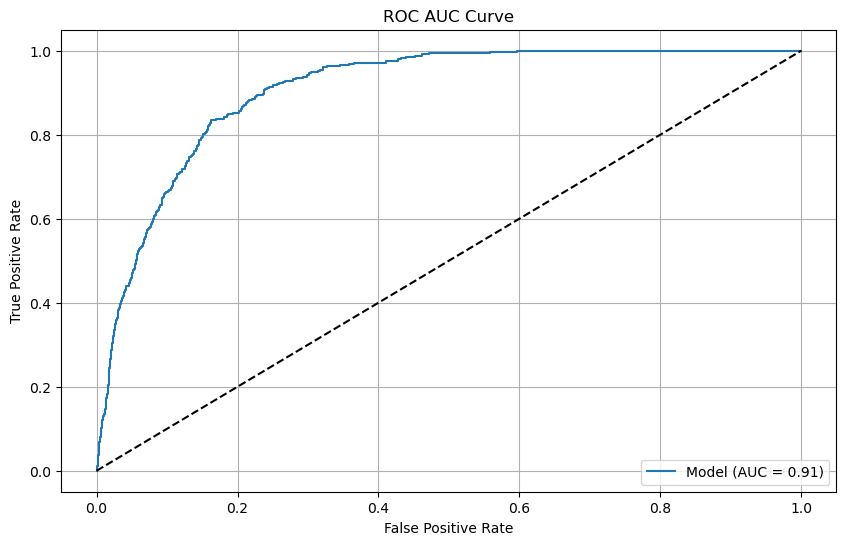

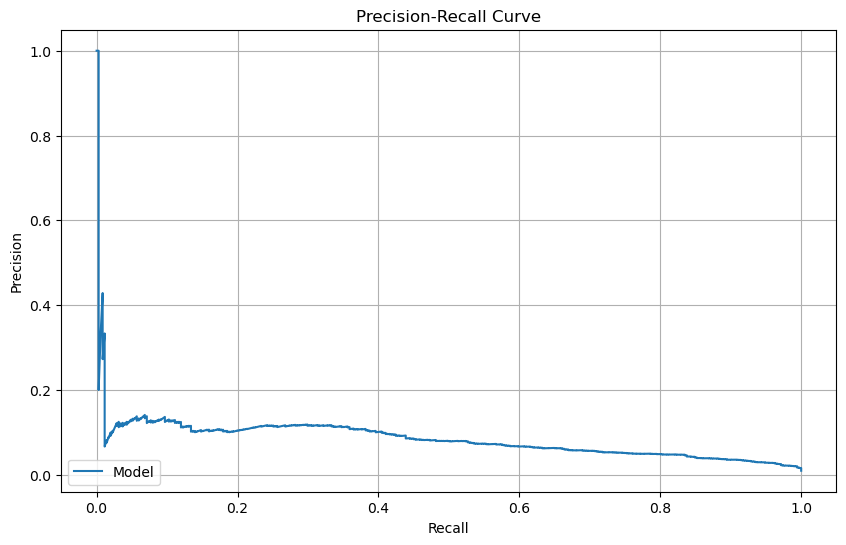

In [1255]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# True labels (y_true)
y_true = combined['ons_target_f1']

# Predictions from your model
y_pred = combined['ons_target_f1_pred']

# Filter out rows with missing values
valid_indices = np.logical_not(np.isnan(y_true) | np.isnan(y_pred))
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Calculate ROC AUC scores
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Feature: count_events_1_stock, Importance: 0.007169124726829833
Feature: count_events_1, Importance: 0.010669231303428141
Feature: count_events_1_opp, Importance: 0.01176973854149746
Feature: count_events_1_gov, Importance: 0.005364765416825369
Feature: count_events_2_stock, Importance: 0.005822500128702974
Feature: count_events_2, Importance: 0.011252546800073489
Feature: count_events_2_opp, Importance: 0.0023965586497165445
Feature: count_events_2_gov, Importance: 0.006021920472261517
Feature: count_events_3_stock, Importance: 0.004762014715864413
Feature: count_events_3, Importance: 0.023794044956923065
Feature: count_events_3_opp, Importance: 0.007867859978770438
Feature: count_events_3_gov, Importance: 0.008361909598567118
Feature: count_events_4_stock, Importance: 0.006015873245240265
Feature: count_events_4, Importance: 0.013289899012791331
Feature: count_events_4_opp, Importance: 0.014210867904292834
Feature: count_events_4_gov, Importance: 0.005593808264295239
Feature: count_e

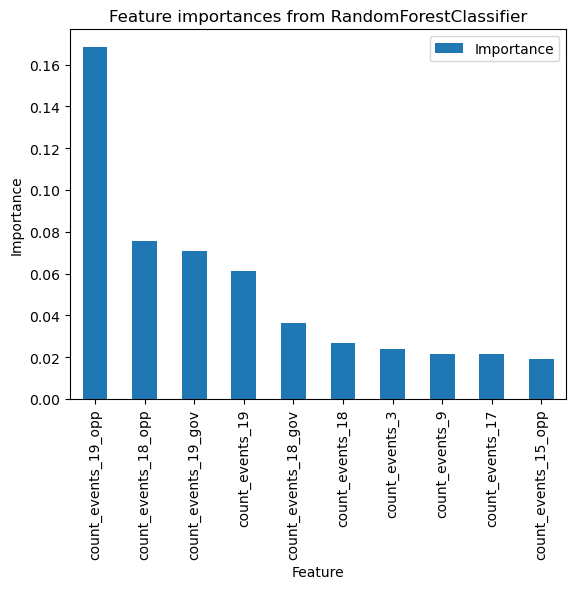

In [1256]:
importances = clf.feature_importances_

# name and importance of each feature
for feature_name, importance in zip(X.columns, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

feature_importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})

# sorting DataFrame to make the plot more readable
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False).head(10)

# bar plot
feature_importances_df.plot(kind="bar", x="Feature", y="Importance")
plt.title("Feature importances from RandomForestClassifier")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()


In [1257]:
y_pred

394      0.513160
395      0.438649
396      0.376388
397      0.301068
398      0.347934
           ...   
98634    0.000342
98635    0.000356
98636    0.000353
98637    0.000382
98638    0.000387
Name: ons_target_f1_pred, Length: 36458, dtype: float64

In [1258]:
y_pred_binary = (y_pred < 0.5).astype(int)


In [1259]:
from sklearn.linear_model import LogisticRegression

def setparams_lr(C, penalty, solver):
    print("setting parameters")
    print("they are:", C, penalty, solver)
    
    lr = LogisticRegression(C=C, penalty=penalty, solver=solver, n_jobs=8)
    return lr

C = 1.0
penalty = 'l2'
solver = 'lbfgs'
initialize = 1
search = 0

In [1260]:
gendata=1

depths = 8
trees = 700
min_samples_splits = 2
min_samples_leafs = 100
forward = 1
startyearid = 2010
deps = ['ons_target_f{}'.format(forward)]


# Initialize an empty dataframe for storing fitted values
fittedvalues=['isocode', 'year', 'month']
fittedframe = pd.DataFrame(columns=['isocode','year','month'])

for yearid in range(startyearid, 2024):
    if yearid<2023:
        maxmonth = 13
        print("before 2023, going till", maxmonth)
    else:
        maxmonth = 4
        print("in 2023, going till", maxmonth)

    for monthid in range(1, maxmonth):
        print(yearid)
        print(monthid)

        y, X, X_future, future_model = prepare_slice(count_events, yearid, monthid, deps, forward)
        fittedframe_future = future_model[fittedvalues]
        # Perform grid search or set parameters directly
        if search == 1:
            print("entering search")
            lr = runsearch(X, y) 
        else:
            lr = setparams_lr(C, penalty, solver)

        # Fit the model and make predictions
        lr.fit(X, y)
        res = lr.predict_proba(X_future)
        fittedframe_future[deps[0]+'_pred'] = res[:, 1]

        # Append the predictions to the fittedframe
        fittedframe = pd.concat([fittedframe, fittedframe_future])

gendata = 1
fittedframe.to_csv("{}_predictions_log.csv".format(deps[0]))


before 2023, going till 13
2010
1
['ons_target_f1']
pre drop  98640
2010
1
post drop model 60240
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
2
['ons_target_f1']
pre drop  98640
2010
2
post drop model 60480
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
3
['ons_target_f1']
pre drop  98640
2010
3
post drop model 60720
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
4
['ons_target_f1']
pre drop  98640
2010
4
post drop model 60960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
5
['ons_target_f1']
pre drop  98640
2010
5
post drop model 61200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
6
['ons_target_f1']
pre drop  98640
2010
6
post drop model 61440
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
7
['ons_target_f1']
pre drop  98640
2010
7
post drop model 61680
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
8
['ons_target_f1']
pre drop  98640
2010
8
post drop model 61920
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
9
['ons_target_f1']
pre drop  98640
2010
9
post drop model 62160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
10
['ons_target_f1']
pre drop  98640
2010
10
post drop model 62400
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
11
['ons_target_f1']
pre drop  98640
2010
11
post drop model 62640
setting parameters
they are: 1.0 l2 lbfgs


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2010
12
['ons_target_f1']
pre drop  98640
2010
12
post drop model 62880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2011
1
['ons_target_f1']
pre drop  98640
2011
1
post drop model 63120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
2
['ons_target_f1']
pre drop  98640
2011
2
post drop model 63360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
3
['ons_target_f1']
pre drop  98640
2011
3
post drop model 63600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
4
['ons_target_f1']
pre drop  98640
2011
4
post drop model 63840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
5
['ons_target_f1']
pre drop  98640
2011
5
post drop model 64080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
6
['ons_target_f1']
pre drop  98640
2011
6
post drop model 64320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
7
['ons_target_f1']
pre drop  98640
2011
7
post drop model 64560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
8
['ons_target_f1']
pre drop  98640
2011
8
post drop model 64800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
9
['ons_target_f1']
pre drop  98640
2011
9
post drop model 65040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
10
['ons_target_f1']
pre drop  98640
2011
10
post drop model 65280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
11
['ons_target_f1']
pre drop  98640
2011
11
post drop model 65520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2011
12
['ons_target_f1']
pre drop  98640
2011
12
post drop model 65760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2012
1
['ons_target_f1']
pre drop  98640
2012
1
post drop model 66000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
2
['ons_target_f1']
pre drop  98640
2012
2
post drop model 66240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
3
['ons_target_f1']
pre drop  98640
2012
3
post drop model 66480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
4
['ons_target_f1']
pre drop  98640
2012
4
post drop model 66720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
5
['ons_target_f1']
pre drop  98640
2012
5
post drop model 66960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
6
['ons_target_f1']
pre drop  98640
2012
6
post drop model 67200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
7
['ons_target_f1']
pre drop  98640
2012
7
post drop model 67440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
8
['ons_target_f1']
pre drop  98640
2012
8
post drop model 67680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
9
['ons_target_f1']
pre drop  98640
2012
9
post drop model 67920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
10
['ons_target_f1']
pre drop  98640
2012
10
post drop model 68160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
11
['ons_target_f1']
pre drop  98640
2012
11
post drop model 68400
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2012
12
['ons_target_f1']
pre drop  98640
2012
12
post drop model 68640
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2013
1
['ons_target_f1']
pre drop  98640
2013
1
post drop model 68880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
2
['ons_target_f1']
pre drop  98640
2013
2
post drop model 69120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
3
['ons_target_f1']
pre drop  98640
2013
3
post drop model 69360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
4
['ons_target_f1']
pre drop  98640
2013
4
post drop model 69600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
5
['ons_target_f1']
pre drop  98640
2013
5
post drop model 69840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
6
['ons_target_f1']
pre drop  98640
2013
6
post drop model 70080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
7
['ons_target_f1']
pre drop  98640
2013
7
post drop model 70320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
8
['ons_target_f1']
pre drop  98640
2013
8
post drop model 70560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
9
['ons_target_f1']
pre drop  98640
2013
9
post drop model 70800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
10
['ons_target_f1']
pre drop  98640
2013
10
post drop model 71040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
11
['ons_target_f1']
pre drop  98640
2013
11
post drop model 71280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2013
12
['ons_target_f1']
pre drop  98640
2013
12
post drop model 71520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2014
1
['ons_target_f1']
pre drop  98640
2014
1
post drop model 71760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
2
['ons_target_f1']
pre drop  98640
2014
2
post drop model 72000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
3
['ons_target_f1']
pre drop  98640
2014
3
post drop model 72240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
4
['ons_target_f1']
pre drop  98640
2014
4
post drop model 72480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
5
['ons_target_f1']
pre drop  98640
2014
5
post drop model 72720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
6
['ons_target_f1']
pre drop  98640
2014
6
post drop model 72960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
7
['ons_target_f1']
pre drop  98640
2014
7
post drop model 73200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
8
['ons_target_f1']
pre drop  98640
2014
8
post drop model 73440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
9
['ons_target_f1']
pre drop  98640
2014
9
post drop model 73680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
10
['ons_target_f1']
pre drop  98640
2014
10
post drop model 73920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
11
['ons_target_f1']
pre drop  98640
2014
11
post drop model 74160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2014
12
['ons_target_f1']
pre drop  98640
2014
12
post drop model 74400
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2015
1
['ons_target_f1']
pre drop  98640
2015
1
post drop model 74640
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
2
['ons_target_f1']
pre drop  98640
2015
2
post drop model 74880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
3
['ons_target_f1']
pre drop  98640
2015
3
post drop model 75120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
4
['ons_target_f1']
pre drop  98640
2015
4
post drop model 75360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
5
['ons_target_f1']
pre drop  98640
2015
5
post drop model 75600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
6
['ons_target_f1']
pre drop  98640
2015
6
post drop model 75840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
7
['ons_target_f1']
pre drop  98640
2015
7
post drop model 76080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
8
['ons_target_f1']
pre drop  98640
2015
8
post drop model 76320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
9
['ons_target_f1']
pre drop  98640
2015
9
post drop model 76560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
10
['ons_target_f1']
pre drop  98640
2015
10
post drop model 76800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
11
['ons_target_f1']
pre drop  98640
2015
11
post drop model 77040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2015
12
['ons_target_f1']
pre drop  98640
2015
12
post drop model 77280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2016
1
['ons_target_f1']
pre drop  98640
2016
1
post drop model 77520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
2
['ons_target_f1']
pre drop  98640
2016
2
post drop model 77760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
3
['ons_target_f1']
pre drop  98640
2016
3
post drop model 78000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
4
['ons_target_f1']
pre drop  98640
2016
4
post drop model 78240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
5
['ons_target_f1']
pre drop  98640
2016
5
post drop model 78480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
6
['ons_target_f1']
pre drop  98640
2016
6
post drop model 78720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
7
['ons_target_f1']
pre drop  98640
2016
7
post drop model 78960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
8
['ons_target_f1']
pre drop  98640
2016
8
post drop model 79200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
9
['ons_target_f1']
pre drop  98640
2016
9
post drop model 79440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
10
['ons_target_f1']
pre drop  98640
2016
10
post drop model 79680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
11
['ons_target_f1']
pre drop  98640
2016
11
post drop model 79920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2016
12
['ons_target_f1']
pre drop  98640
2016
12
post drop model 80160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2017
1
['ons_target_f1']
pre drop  98640
2017
1
post drop model 80400
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
2
['ons_target_f1']
pre drop  98640
2017
2
post drop model 80640
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
3
['ons_target_f1']
pre drop  98640
2017
3
post drop model 80880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
4
['ons_target_f1']
pre drop  98640
2017
4
post drop model 81120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
5
['ons_target_f1']
pre drop  98640
2017
5
post drop model 81360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
6
['ons_target_f1']
pre drop  98640
2017
6
post drop model 81600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
7
['ons_target_f1']
pre drop  98640
2017
7
post drop model 81840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
8
['ons_target_f1']
pre drop  98640
2017
8
post drop model 82080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
9
['ons_target_f1']
pre drop  98640
2017
9
post drop model 82320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
10
['ons_target_f1']
pre drop  98640
2017
10
post drop model 82560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
11
['ons_target_f1']
pre drop  98640
2017
11
post drop model 82800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2017
12
['ons_target_f1']
pre drop  98640
2017
12
post drop model 83040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2018
1
['ons_target_f1']
pre drop  98640
2018
1
post drop model 83280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
2
['ons_target_f1']
pre drop  98640
2018
2
post drop model 83520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
3
['ons_target_f1']
pre drop  98640
2018
3
post drop model 83760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
4
['ons_target_f1']
pre drop  98640
2018
4
post drop model 84000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
5
['ons_target_f1']
pre drop  98640
2018
5
post drop model 84240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
6
['ons_target_f1']
pre drop  98640
2018
6
post drop model 84480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
7
['ons_target_f1']
pre drop  98640
2018
7
post drop model 84720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
8
['ons_target_f1']
pre drop  98640
2018
8
post drop model 84960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
9
['ons_target_f1']
pre drop  98640
2018
9
post drop model 85200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
10
['ons_target_f1']
pre drop  98640
2018
10
post drop model 85440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
11
['ons_target_f1']
pre drop  98640
2018
11
post drop model 85680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2018
12
['ons_target_f1']
pre drop  98640
2018
12
post drop model 85920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2019
1
['ons_target_f1']
pre drop  98640
2019
1
post drop model 86160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
2
['ons_target_f1']
pre drop  98640
2019
2
post drop model 86400
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
3
['ons_target_f1']
pre drop  98640
2019
3
post drop model 86640
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
4
['ons_target_f1']
pre drop  98640
2019
4
post drop model 86880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
5
['ons_target_f1']
pre drop  98640
2019
5
post drop model 87120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
6
['ons_target_f1']
pre drop  98640
2019
6
post drop model 87360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
7
['ons_target_f1']
pre drop  98640
2019
7
post drop model 87600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
8
['ons_target_f1']
pre drop  98640
2019
8
post drop model 87840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
9
['ons_target_f1']
pre drop  98640
2019
9
post drop model 88080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
10
['ons_target_f1']
pre drop  98640
2019
10
post drop model 88320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
11
['ons_target_f1']
pre drop  98640
2019
11
post drop model 88560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2019
12
['ons_target_f1']
pre drop  98640
2019
12
post drop model 88800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2020
1
['ons_target_f1']
pre drop  98640
2020
1
post drop model 89040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
2
['ons_target_f1']
pre drop  98640
2020
2
post drop model 89280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
3
['ons_target_f1']
pre drop  98640
2020
3
post drop model 89520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
4
['ons_target_f1']
pre drop  98640
2020
4
post drop model 89760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
5
['ons_target_f1']
pre drop  98640
2020
5
post drop model 90000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
6
['ons_target_f1']
pre drop  98640
2020
6
post drop model 90240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
7
['ons_target_f1']
pre drop  98640
2020
7
post drop model 90480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
8
['ons_target_f1']
pre drop  98640
2020
8
post drop model 90720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
9
['ons_target_f1']
pre drop  98640
2020
9
post drop model 90960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
10
['ons_target_f1']
pre drop  98640
2020
10
post drop model 91200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
11
['ons_target_f1']
pre drop  98640
2020
11
post drop model 91440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2020
12
['ons_target_f1']
pre drop  98640
2020
12
post drop model 91680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2021
1
['ons_target_f1']
pre drop  98640
2021
1
post drop model 91920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
2
['ons_target_f1']
pre drop  98640
2021
2
post drop model 92160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
3
['ons_target_f1']
pre drop  98640
2021
3
post drop model 92400
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
4
['ons_target_f1']
pre drop  98640
2021
4
post drop model 92640
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
5
['ons_target_f1']
pre drop  98640
2021
5
post drop model 92880
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
6
['ons_target_f1']
pre drop  98640
2021
6
post drop model 93120
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
7
['ons_target_f1']
pre drop  98640
2021
7
post drop model 93360
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
8
['ons_target_f1']
pre drop  98640
2021
8
post drop model 93600
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
9
['ons_target_f1']
pre drop  98640
2021
9
post drop model 93840
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
10
['ons_target_f1']
pre drop  98640
2021
10
post drop model 94080
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
11
['ons_target_f1']
pre drop  98640
2021
11
post drop model 94320
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
12
['ons_target_f1']
pre drop  98640
2021
12
post drop model 94560
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2022
1
['ons_target_f1']
pre drop  98640
2022
1
post drop model 94800
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
2
['ons_target_f1']
pre drop  98640
2022
2
post drop model 95040
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
3
['ons_target_f1']
pre drop  98640
2022
3
post drop model 95280
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
4
['ons_target_f1']
pre drop  98640
2022
4
post drop model 95520
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
5
['ons_target_f1']
pre drop  98640
2022
5
post drop model 95760
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
6
['ons_target_f1']
pre drop  98640
2022
6
post drop model 96000
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
7
['ons_target_f1']
pre drop  98640
2022
7
post drop model 96240
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
8
['ons_target_f1']
pre drop  98640
2022
8
post drop model 96480
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
9
['ons_target_f1']
pre drop  98640
2022
9
post drop model 96720
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
10
['ons_target_f1']
pre drop  98640
2022
10
post drop model 96960
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
11
['ons_target_f1']
pre drop  98640
2022
11
post drop model 97200
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
12
['ons_target_f1']
pre drop  98640
2022
12
post drop model 97440
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


in 2023, going till 4
2023
1
['ons_target_f1']
pre drop  98640
2023
1
post drop model 97680
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
2
['ons_target_f1']
pre drop  98640
2023
2
post drop model 97920
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
3
['ons_target_f1']
pre drop  98640
2023
3
post drop model 98160
setting parameters
they are: 1.0 l2 lbfgs


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/2770474830.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


In [1261]:
data = df

for deps in [['ons_target_f{}'.format(forward)]]:
    
    my_file = Path("{}_predictions_log.csv".format(deps[0]))

    predictions = pd.read_table(my_file, sep=',').iloc[:, 1:]

    # Select only rows where the prediction is not NaN
    fittedvalues = predictions.dropna(subset=['{}_pred'.format(deps[0])])

    # Merge the predictions into the original dataframe
    data = data.merge(fittedvalues, how='left', on=['isocode', 'year', 'month'])

# Add dependent variables again
combined_log = make_target(data, forward)
combined_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98640 entries, 0 to 98639
Columns: 134 entries, MonthYear to ons_target_f1
dtypes: float64(68), int64(4), object(62)
memory usage: 101.6+ MB


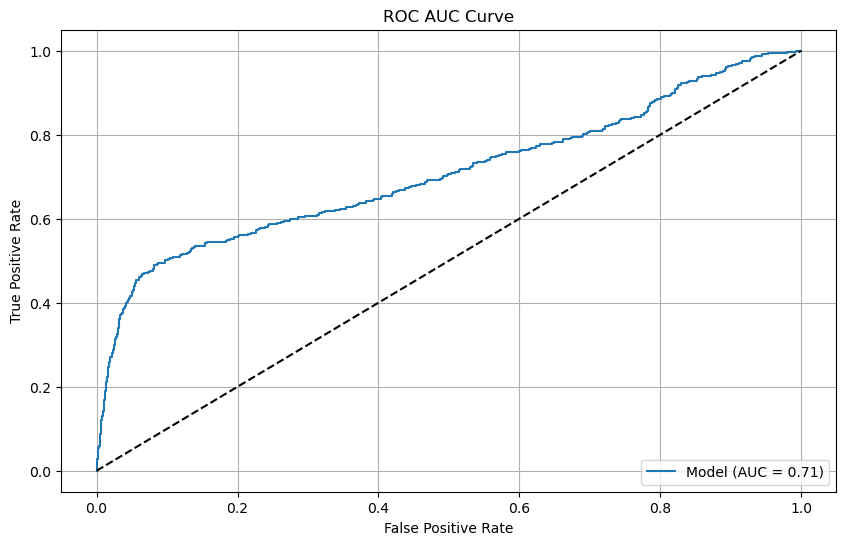

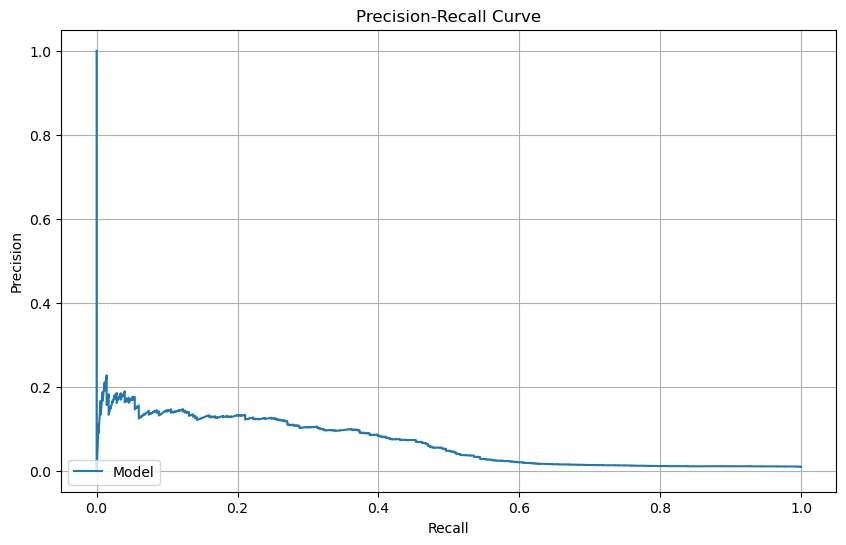

In [1262]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# True labels (y_true)
y_true = combined_log['ons_target_f1']

# Predictions from your model
y_pred = combined_log['ons_target_f1_pred']

# Filter out rows with missing values
valid_indices = np.logical_not(np.isnan(y_true) | np.isnan(y_pred))
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Calculate ROC AUC scores
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [1263]:
def separation_plot(pdata, fname, alpha=1):
    '''
    Display observed events against predicted probabilities for binary classification problems
    Arguments
    ---------
        y : vector of observed class labels
        yhat : vector of predicted probabilities
        fname: file path to directory to save plot 
        alpha: float from 0 to 1, transparency of indicators of observed events
    '''

    pdata.columns = ['y', 'yhat']
    pdata = pdata.sort_values('yhat')
    pdata = pdata.reset_index(drop=True)

    events = pdata[pdata['y'] == 1]

    evals = events.index.values


    plt.figure(figsize=(20, 5))
    plt.ylabel('Predicted risk')
    ax = plt.gca()
    ax.set_xlim([1, (evals[-1] + 1)])
    ax.set_ylim([0, 1])
    

    rr = 0
    for i in evals:
        if rr == 0:
            ax.axvline(x=i, linewidth=0.2, linestyle='-', color='k', alpha=alpha, label = 'Onsets', zorder=2)
            rr = 1
        else:
            ax.axvline(x=i, linewidth=0.2, linestyle='-', color='k', alpha=alpha, zorder=1)
    
    ax.plot(pdata['yhat'], linestyle='--', color='red', lw = 4, label = 'Predicted risk', zorder=3)
    ax.set_xlabel('Rank of prediction')
    ax.legend(loc="upper left")
    plt.savefig(fname)
    plt.show()
    plt.close() 